In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("https://github.com/datasciencedojo/datasets/blob/master/titanic.csv?raw=true")

In [15]:
column_with_highest_missing = df.isnull().sum().idxmax()
df.drop(labels=column_with_highest_missing,axis=1,inplace=True)

In [18]:
df.loc[df["Age"] > 30]["PassengerId"].count()

np.int64(305)

In [22]:
df[df["Pclass"] == 2]["Fare"].sum()


np.float64(3801.8417)

In [24]:
df.columns
df.groupby("Pclass")["Survived"].agg("count")

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [ ]:
df.groupby("Sex")["Age"].agg("describe")
# df.columns

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


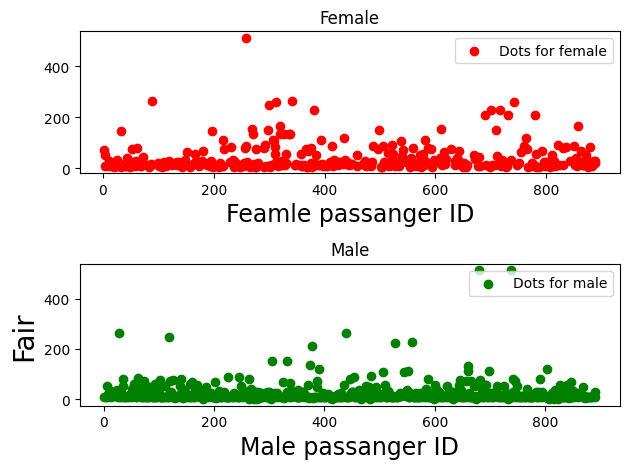

In [52]:
fig,axes = plt.subplots(2,1)

plt.title("Scatter plot for passenger vs fair",fontsize=25)
plt.ylabel("Fair",fontsize=20)

axes[0].scatter(df[df["Sex"] == "female"]["PassengerId"],y=df[df["Sex"] == "female"]["Fare"],c="red",label="Dots for female")
axes[1].scatter(df[df["Sex"] == "male"]["PassengerId"],y=df[df["Sex"] == "male"]["Fare"],c="green",label="Dots for male")
axes[1].set_title("Male")
axes[0].set_title("Female")
axes[0].set_xlabel("Feamle passanger ID",fontsize=17)
axes[1].set_xlabel("Male passanger ID",fontsize=17)
axes[0].legend()
axes[1].legend()
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Density'>

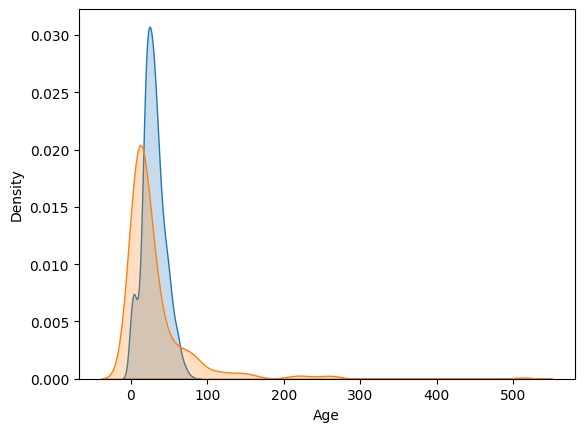

In [55]:
sns.kdeplot(df["Age"],fill=True)
sns.kdeplot(df["Fare"],fill=True)

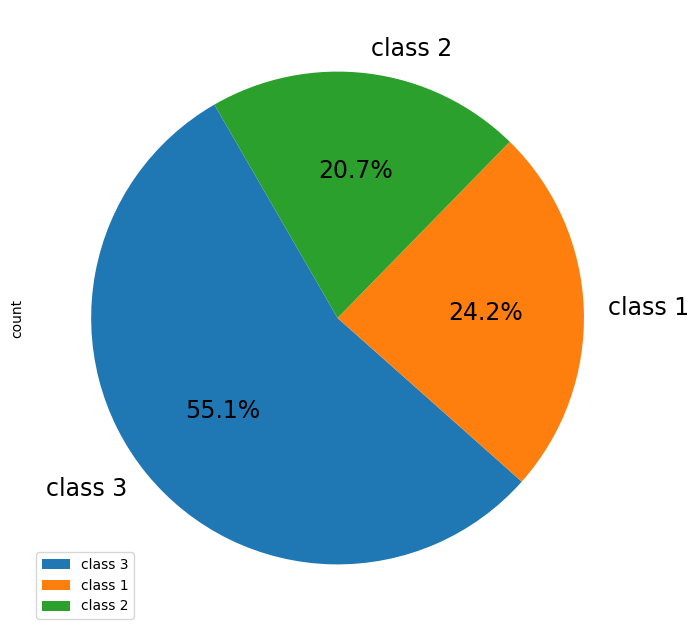

In [76]:
df["Class_Codes"] = pd.Categorical.from_codes(df["Pclass"] - 1,["class 1","class 2","class 3"])

plt.figure(figsize=(12,8))
values_counts_of_class = df.Class_Codes.value_counts()
values_counts_of_class.plot.pie(autopct="%1.1f%%",startangle=120,fontsize=17)
plt.legend(loc="lower left")


In [85]:
total = df.groupby("Class_Codes")["Class_Codes"].count()
survived = df.groupby("Class_Codes")["Survived"].sum()

percentage = (survived / total) * 100
percentage


/tmp/ipykernel_41279/3075751686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df.groupby("Class_Codes")["Class_Codes"].count()
/tmp/ipykernel_41279/3075751686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived = df.groupby("Class_Codes")["Survived"].sum()


Class_Codes
class 1    62.962963
class 2    47.282609
class 3    24.236253
dtype: float64

## Yes definately, class played a role in survival, higher the class, lesser the fatality